In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('skills recommendation system.csv')

# Specify columns to keep for the recommendation system
columns_to_keep = ['UserID', 'SkillID', 'SkillName', 'SkillLevel', 'YearsOfExperience']

# Keep only the specified columns
df = df[columns_to_keep]

# Drop duplicates based on the 'UserID', 'SkillID', and 'SkillLevel' columns
df_cleaned = df.drop_duplicates(subset=['UserID', 'SkillID', 'SkillLevel'])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Reset index after dropping rows
df_cleaned = df_cleaned.reset_index(drop=True)

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print("Cleaning completed. Cleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaning completed. Cleaned dataset saved as 'cleaned_dataset.csv'.


In [2]:
clean_data=pd.read_csv('cleaned_dataset.csv')
clean_data

,UserID,SkillID,SkillName,SkillLevel,YearsOfExperience
0,1,1,Python,Advanced,5
1,1,2,JavaScript,Intermediate,3
2,1,4,Machine Learning,Beginner,1
3,2,1,Python,Intermediate,2
4,2,3,SQL,Beginner,1
...,...,...,...,...,...
131,65,127,Azure Functions,Intermediate,2
132,66,128,Apache Kafka,Beginner,1
133,66,129,ETL Processes,Intermediate,2
134,67,130,Wireframing,Beginner,1


In [3]:
clean_data.tail()

,UserID,SkillID,SkillName,SkillLevel,YearsOfExperience
131,65,127,Azure Functions,Intermediate,2
132,66,128,Apache Kafka,Beginner,1
133,66,129,ETL Processes,Intermediate,2
134,67,130,Wireframing,Beginner,1
135,67,131,User Research,Intermediate,2


In [48]:
clean_data.head()

,UserID,SkillID,SkillName,SkillLevel,YearsOfExperience
0,1,1,Python,Advanced,5
1,1,2,JavaScript,Intermediate,3
2,1,4,Machine Learning,Beginner,1
3,2,1,Python,Intermediate,2
4,2,3,SQL,Beginner,1


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
clean_data = pd.read_csv('cleaned_dataset.csv')

# Display basic statistics of the dataset
print("Dataset Statistics:")
print(df.describe())

Dataset Statistics:
           UserID     SkillID  YearsOfExperience
count  136.000000  136.000000         136.000000
mean    33.522059   63.683824           2.397059
std     19.663452   39.106256           1.405173
min      1.000000    1.000000           1.000000
25%     16.750000   29.750000           1.000000
50%     33.500000   63.500000           2.000000
75%     50.250000   97.250000           3.000000
max     67.000000  131.000000           7.000000


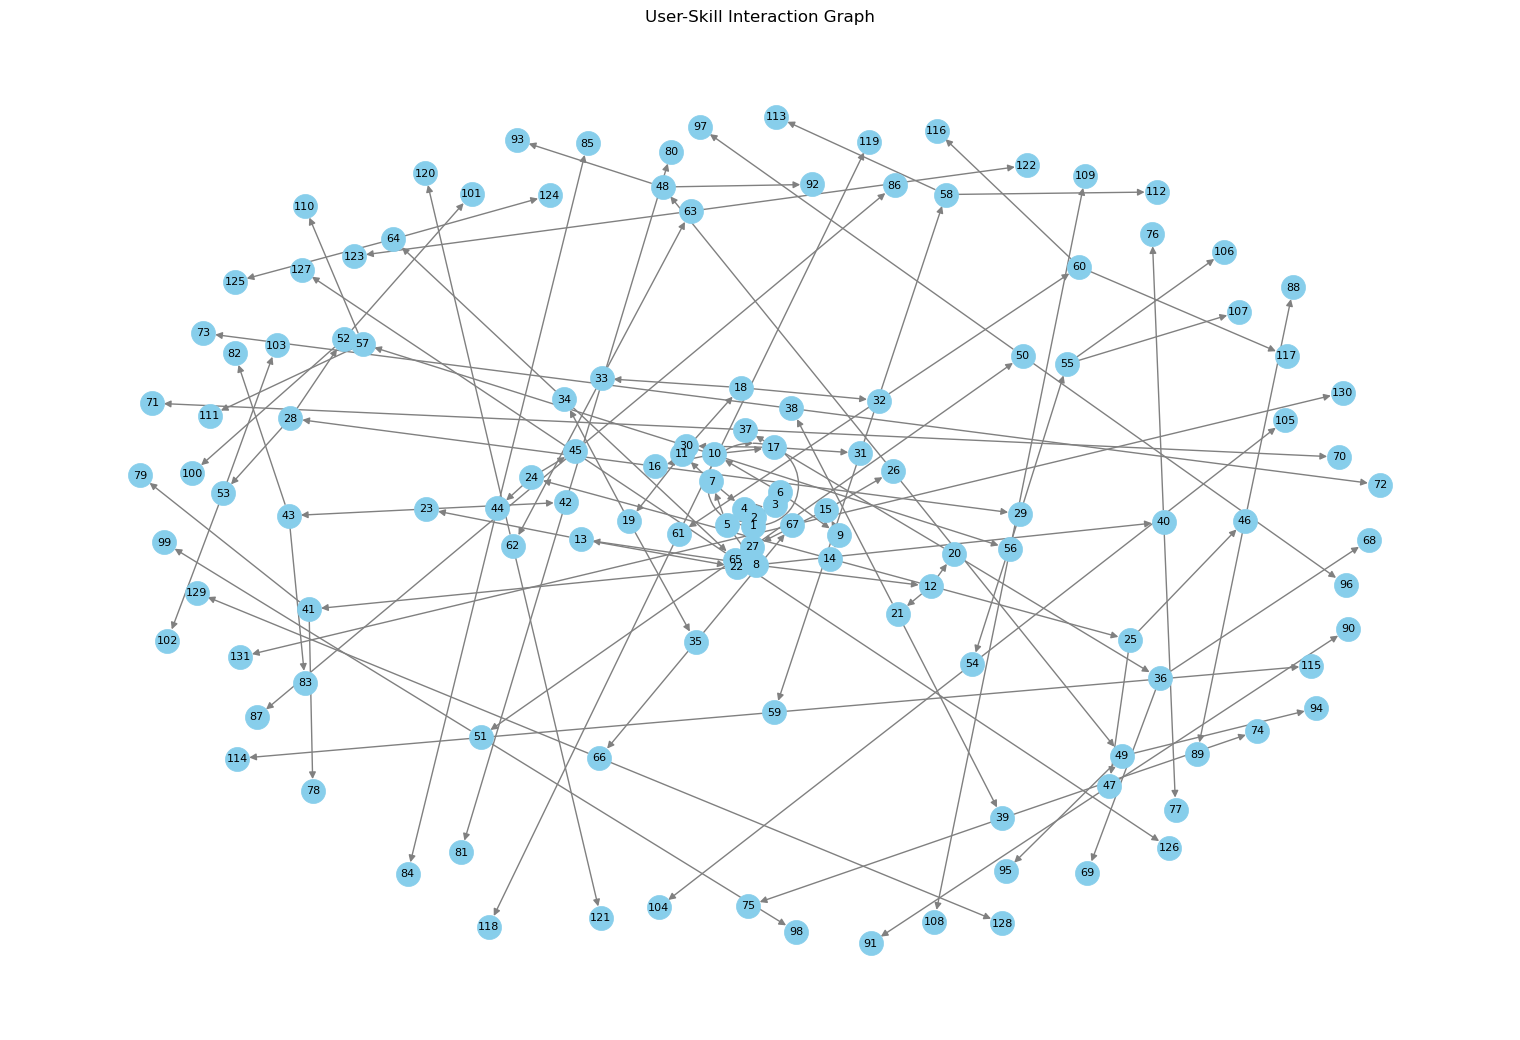

In [50]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the cleaned dataset
clean_data = pd.read_csv('cleaned_dataset.csv')

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    G.add_node(row['UserID'], node_type='user')
    G.add_node(row['SkillID'], node_type='skill')
    G.add_edge(row['UserID'], row['SkillID'])

# Plot the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=300, node_color='skyblue', edge_color='gray', linewidths=0.5)
plt.title('User-Skill Interaction Graph')
plt.show()


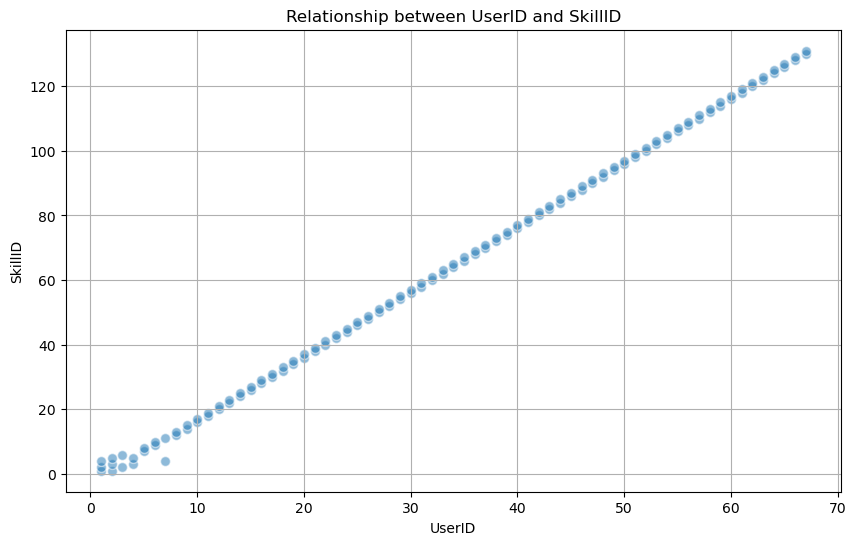

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
clean_data = pd.read_csv('cleaned_dataset.csv')

# Scatter plot of UserID and SkillID
plt.figure(figsize=(10, 6))
plt.scatter(df['UserID'], df['SkillID'], alpha=0.5, edgecolors='w', s=50)
plt.title('Relationship between UserID and SkillID')
plt.xlabel('UserID')
plt.ylabel('SkillID')
plt.grid(True)
plt.show()


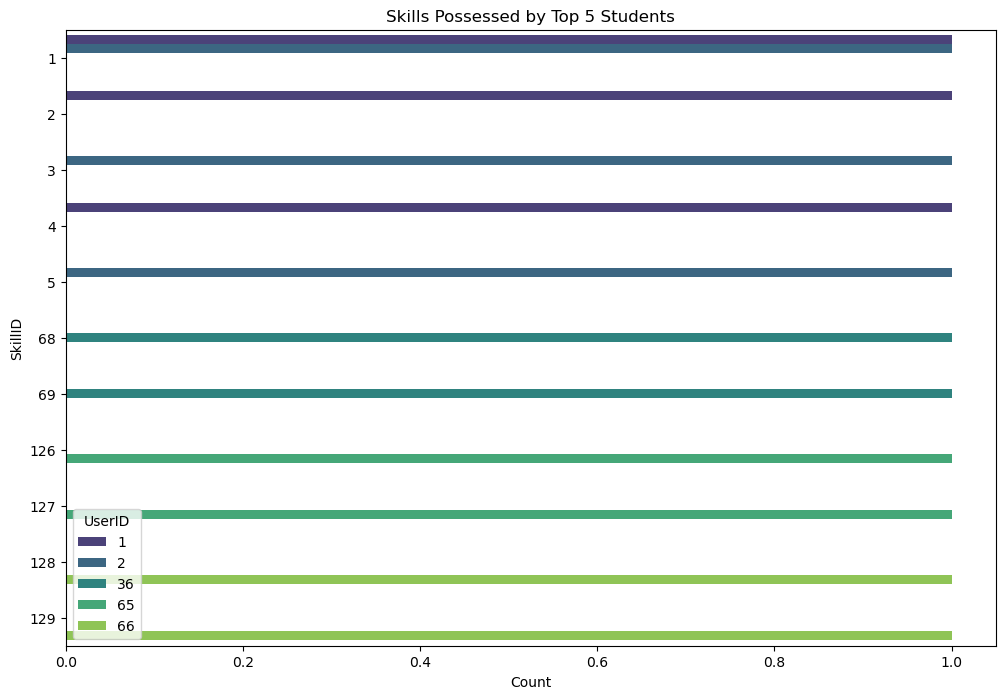

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
clean_data = pd.read_csv('cleaned_dataset.csv')

# Assuming 'UserRating' is the skill level
# You may adjust this depending on your actual dataset
top_students = df.groupby('UserID')['SkillID'].count().sort_values(ascending=False).head(5).index
top_students_data = df[df['UserID'].isin(top_students)]

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.countplot(y='SkillID', hue='UserID', data=top_students_data, palette='viridis')
plt.title('Skills Possessed by Top 5 Students')
plt.xlabel('Count')
plt.ylabel('SkillID')
plt.legend(title='UserID')
plt.show()


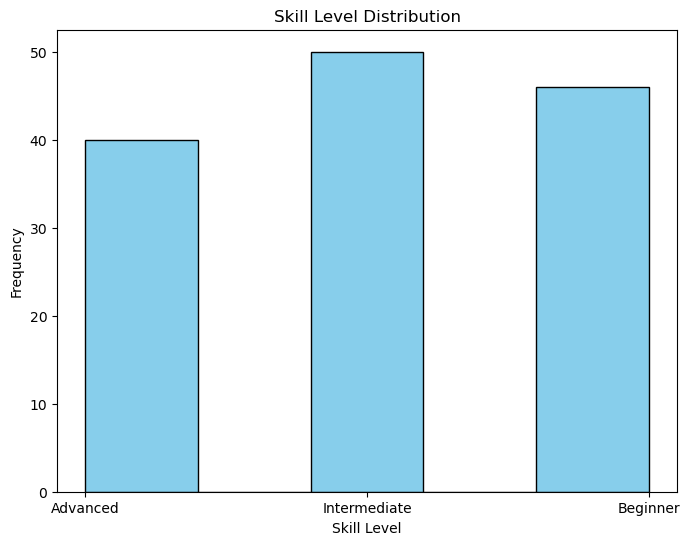

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Plot Skill Level Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['SkillLevel'], bins=5, color='skyblue', edgecolor='black')
plt.title('Skill Level Distribution')
plt.xlabel('Skill Level')
plt.ylabel('Frequency')
plt.show()


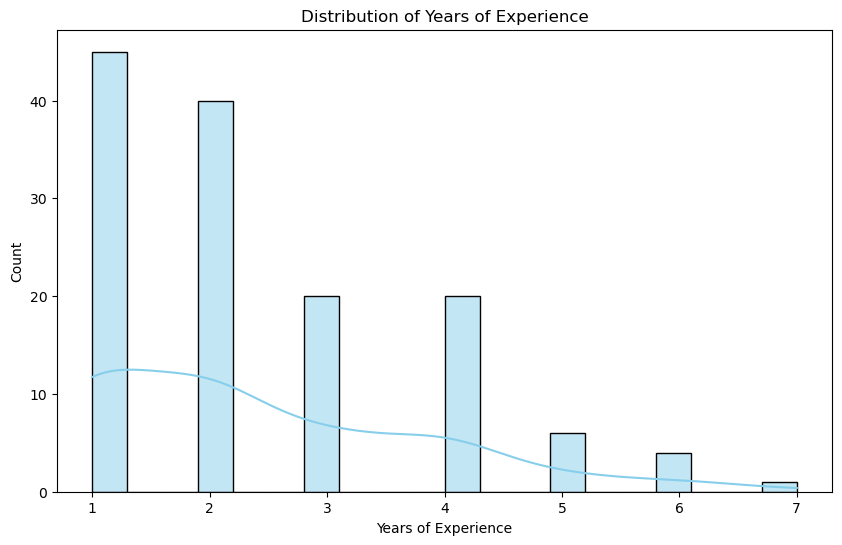

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Create a histogram for Years of Experience
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsOfExperience'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()


C:\Users\zarri\AppData\Local\Temp\ipykernel_15052\570142209.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SkillName', y='YearsOfExperience', data=top_skills_data, ci=None, palette='viridis')


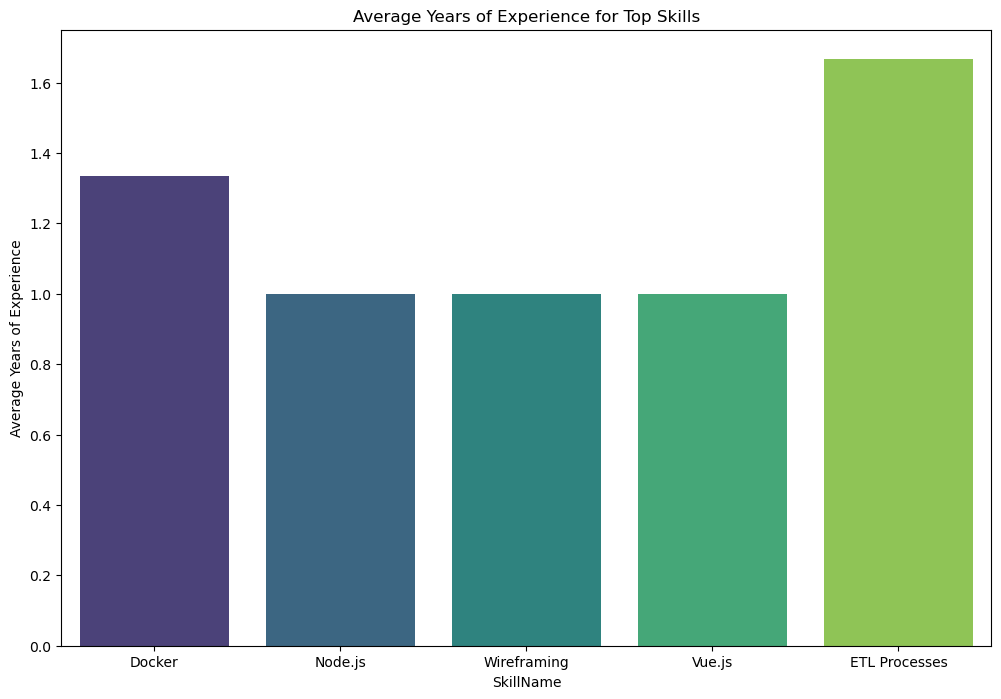

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Assuming 'UserRating' is the skill level
# You may adjust this depending on your actual dataset
top_skills = df.groupby('SkillName')['UserID'].count().sort_values(ascending=False).head(5).index
top_skills_data = df[df['SkillName'].isin(top_skills)]

# Create a bar chart showing average years of experience for each skill
plt.figure(figsize=(12, 8))
sns.barplot(x='SkillName', y='YearsOfExperience', data=top_skills_data, ci=None, palette='viridis')
plt.title('Average Years of Experience for Top Skills')
plt.xlabel('SkillName')
plt.ylabel('Average Years of Experience')
plt.show()


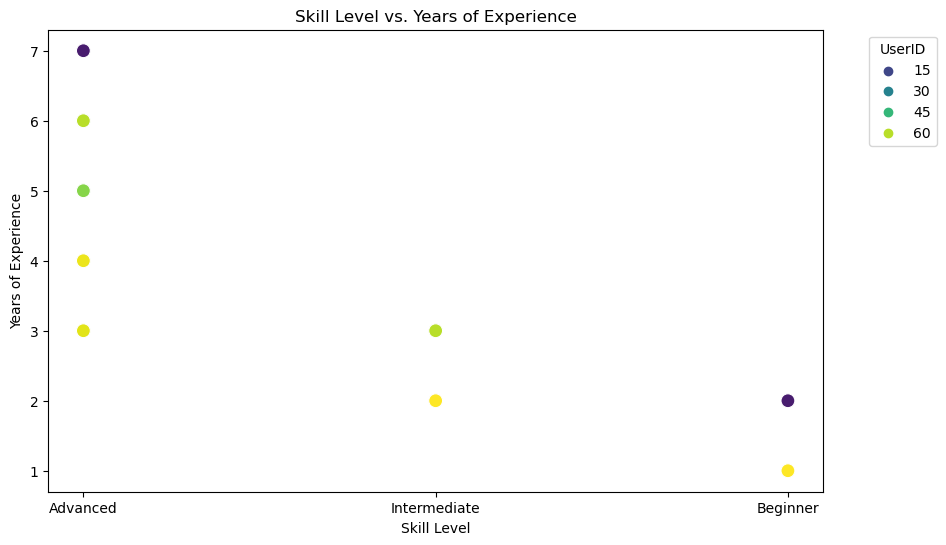

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'UserRating' is the Skill Level, and 'YearsOfExperience' is the Years of Experience
# You may adjust this depending on your actual dataset
df = pd.read_csv('cleaned_dataset.csv')

# Scatter plot for Skill Level vs. Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SkillLevel', y='YearsOfExperience', data=df, hue='UserID', palette='viridis', s=100)
plt.title('Skill Level vs. Years of Experience')
plt.xlabel('Skill Level')
plt.ylabel('Years of Experience')
plt.legend(title='UserID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


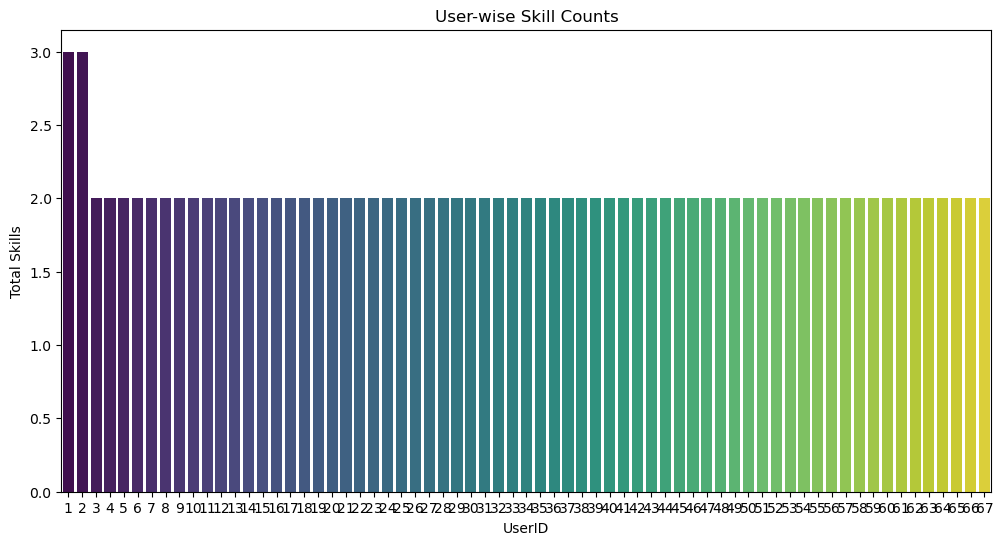

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'UserRating' is the skill level
# You may adjust this depending on your actual dataset
df = pd.read_csv('cleaned_dataset.csv')

# Count the occurrences of each unique combination of UserID and SkillID
user_skill_counts = df.groupby(['UserID', 'SkillID']).size().reset_index(name='SkillCount')

# Count the total number of unique skills for each user
total_skills_per_user = user_skill_counts.groupby('UserID')['SkillCount'].sum().reset_index(name='TotalSkills')

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='UserID', y='TotalSkills', data=total_skills_per_user, palette='viridis')
plt.title('User-wise Skill Counts')
plt.xlabel('UserID')
plt.ylabel('Total Skills')
plt.show()


In [11]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file

# Map string values to numeric values for 'SkillLevel'
skill_level_mapping = {'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}
df['SkillLevel'] = df['SkillLevel'].map(skill_level_mapping)

# Assuming 'UserRating' is the skill level
# You may adjust this depending on your actual dataset
X = df.pivot(index='UserID', columns='SkillID', values='SkillLevel').fillna(0)

# Instantiate and fit the NearestNeighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X)

# Replace USER_ID with the actual user ID you want to recommend skills for
user_id_to_recommend = input("enter user id")  # Replace 123 with the actual user ID

# Check if the user ID exists in the dataset
if user_id_to_recommend not in X.index:
    print(f"Error: User ID {user_id_to_recommend} not found in the dataset.")
else:
    # Find the k most similar items (skills) to the specified user's skills
    k = 5  # Adjust the number of recommendations as needed
    user_skills = X.loc[user_id_to_recommend].values.reshape(1, -1)
    distances, indices = model.kneighbors(user_skills, n_neighbors=k+1)

    # Get the recommended SkillIDs
    recommended_skill_ids = X.columns[indices.flatten()][1:]

    # Print the recommended SkillIDs
    print(f"Top {k} recommended skills for User {user_id_to_recommend}: {recommended_skill_ids}")


enter user id2
Error: User ID 2 not found in the dataset.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Assuming the user provides their UserID and desired SkillLevel
user_id_input = int(input("Enter your UserID: "))
skill_level_input = input("Enter your desired SkillLevel (Beginner/Intermediate/Advanced): ")

# Filter the dataset for the given user ID and SkillLevel
user_data = df[(df['UserID'] == user_id_input) & (df['SkillLevel'] == skill_level_input)]

if user_data.empty:
    print("No matching records found for the provided UserID and SkillLevel.")
else:
    # Extract the features for training the k-NN model
    features = df[['SkillID', 'YearsOfExperience']]

    # Train the k-NN model
    knn_model = NearestNeighbors(n_neighbors=2, algorithm='auto')
    knn_model.fit(features)

    # Find the k-nearest neighbors for the user's input
    user_input = [[user_data['SkillID'].values[0], user_data['YearsOfExperience'].values[0]]]
    _, indices = knn_model.kneighbors(user_input)

    # Get the recommended skills based on the k-nearest neighbors
    recommended_skills = df.iloc[indices[0]][['SkillID', 'SkillName']]

    # Display the user's previous skills and recommended skills
    print("\nUser's Previous Skills:")
    print(user_data[['SkillID', 'SkillName', 'SkillLevel', 'YearsOfExperience']])
    
    print("\nRecommended Skills:")
    print(recommended_skills)

Enter your UserID: 2
Enter your desired SkillLevel (Beginner/Intermediate/Advanced): Intermediate

User's Previous Skills:
   SkillID           SkillName    SkillLevel  YearsOfExperience
3        1              Python  Intermediate                  2
5        5  Data Visualization  Intermediate                  2

Recommended Skills:
   SkillID   SkillName
3        1      Python
1        2  JavaScript


D:\Users\zarri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Encoding categorical variables
label_encoder = LabelEncoder()
df['SkillLevel'] = label_encoder.fit_transform(df['SkillLevel'])

# Extract features and target variable
X = df[['SkillID', 'YearsOfExperience', 'SkillLevel']]
y = df['SkillName']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Assuming the user provides their UserID
user_id_input = int(input("Enter your UserID: "))

# Filter the dataset for the given user ID
user_data = df[df['UserID'] == user_id_input]

if user_data.empty:
    print("No matching records found for the provided UserID.")
else:
    # Extract the user's skills for prediction
    user_skills = user_data[['SkillID', 'YearsOfExperience', 'SkillLevel']]

    # Use the trained model to predict new skills for the user
    predicted_skills = rf_model.predict(user_skills)

    # Display the user's previous skills and recommended skills
    print("\nUser's Previous Skills:")
    print(user_data[['SkillID', 'SkillName', 'SkillLevel', 'YearsOfExperience']])

    print("\nRecommended Skills:")
    print(predicted_skills)


Enter your UserID: 45

User's Previous Skills:
    SkillID           SkillName  SkillLevel  YearsOfExperience
90       86       IT Governance           0                  6
91       87  IT Risk Management           2                  3

Recommended Skills:
['IT Governance' 'IT Risk Management']
